# เฉลยแบบฝึกหัด Text processing
เขียนฟังก์ชันที่นับจำนวนคำภาษาไทย โดยที่ต้องไม่นับ punctuation และ stopwords 

In [3]:
s = """
ปัญหาความเหลื่อมล้ำไม่ได้เกิดขึ้นแค่ในประเทศไทย แต่เกิดขึ้นกับประเทศมหาอำนาจอย่างสหรัฐฯ เช่นเดียวกัน ทางออกที่สหรัฐฯ กำลังจะทำคือการร่างกฎหมาย ‘การเก็บภาษีมหาเศรษฐี’ ขึ้นมาเพื่อแก้ปัญหานี้ ซึ่งถูกเสนอโดยพรรคเดโมแครต เพื่อที่จะนำเงินจากภาษีเหล่านี้มาใช้กับโครงข่ายรองรับทางสังคม (Social Safety Net) ไม่ว่าจะเป็นการช่วยเหลือผู้ที่ได้รับผลกระทบจากวิกฤตต่างๆ ผู้ที่ตกงาน ผู้ด้อยโอกาส เป็นต้น 

 

มหาเศรษฐีที่รวยที่สุดในโลก ณ เวลานี้คือ อีลอน มัสก์ โดยบริษัทรถยนต์ไฟฟ้าของเขาอย่าง Tesla แทบจะเรียกได้ว่าถูกสร้างขึ้นมาด้วยเงินของรัฐบาลเลยก็ว่าได้ เนื่องจากหลายปีที่ผ่านมารัฐบาลต้องการจูงใจให้ประชาชนใช้รถยนต์ไฟฟ้ามากขึ้น จึงออกนโยบายต่างๆ เพื่อสนับสนุน 

 

โดยบริษัทที่ได้รับผลประโยชน์ไปเต็มๆ เลยคือ Tesla ซึ่งผลกำไรส่วนใหญ่ในปัจจุบันของบริษัทมาจากการขายเครดิตรถยนต์ไฟฟ้า ที่รัฐบาลกำหนดให้ผู้ผลิตรถยนต์ต่างๆ ต้องผลิตรถยนต์ไฟฟ้าให้ได้ตามจำนวนที่กำหนด ถ้าผลิตไม่ถึงที่กำหนดจะต้องจ่ายค่าปรับเป็นจำนวนมหาศาล ทำให้ผู้ผลิตรถยนต์รายอื่นๆ ต้องมาซื้อเครดิตจาก Tesla แทน เนื่องจาก Tesla มีการผลิตรถยนต์ไฟฟ้าไปแล้วเป็นจำนวนมาก จนสามารถขายเครดิตให้กับผู้ผลิตรายอื่นๆ ได้อย่างเหลือเฟือ

 

ซึ่งการสนับสนุนของรัฐบาลนี้อาจเป็นเหตุผลที่ว่า ทำไม Tesla ถึงมีมูลค่ามากกว่า Toyota ถึง 3 เท่า ทั้งๆ ที่ขายรถยนต์ได้น้อยกว่ามาก 

 

นอกจากนั้นองค์กรไม่แสวงหาผลกำไรอย่าง ProPublica ได้เปิดเผยว่า อีลอน มัสก์ ยังเป็น 1 ในเหล่ามหาเศรษฐีที่ร่ำรวยที่สุดในโลก ที่ใช้วิธีการต่างๆ เพื่อหลีกเลี่ยงการจ่ายภาษีเงินได้บุคคลธรรมดาอีกด้วย อย่างมหาเศรษฐีอีกคนที่ใช้วิธีการเดียวกันนี้คือ เจฟฟ์ เบโซส์ เจ้าของ Amazon และบริษัทท่องอวกาศอย่าง Blue Origin 

 

ล่าสุด มัสก์ออกมาเคลื่อนไหวเกี่ยวกับประเด็นนี้ โดยทวีตว่า ‘การเก็บภาษีเหล่าเศรษฐี’ จะช่วยแก้ปัญหาหนี้สินของรัฐบาลได้เพียงเล็กน้อยเท่านั้น สิ่งที่ควรแก้ไขจริงๆ คือการใช้จ่ายของรัฐบาลมากกว่า พร้อมกล่าวเพิ่มเติมว่า หากรัฐเก็บภาษีจากเหล่ามหาเศรษฐีได้ครบ 100% แล้วก็ยังไม่พอต่อการใช้หนี้อยู่ดี และต้องหันไปเก็บภาษีเพิ่มกับประชาชนทั่วไปในภายหลัง โดยทวีตเพิ่มเติมว่าหากเก็บจากเหล่ามหาเศรษฐีแล้วก็ยังได้เพียงแค่ 10% ของ 3.5 ล้านล้านดอลลาร์ของหนี้ที่มีอยู่เท่านั้น และอีก 90% ที่เหลือจะเก็บจากใคร ก็เก็บจาก ‘คุณ’ ไง 

 

ทำไมภาษีมหาเศรษฐีจึงจำเป็น?
มหาเศรษฐีระดับโลกหลายคนใช้การหลีกเลี่ยงภาษีโดยวิธีการ ‘ซื้อ กู้ ตาย’ อธิบายโดยศาสตราจารย์ด้านกฎหมายของมหาวิทยาลัยเซาเทิร์นแคลิฟอร์เนีย เอ็ดเวิร์ด เจ. แมคคอฟเฟอรี โดยมหาเศรษฐีจะนำเงินที่ได้จากบริษัทไปซื้อทรัพย์สินต่างๆ แทนการถือเป็นเงินสด ตราบใดที่ทรัพย์สินเหล่านั้นไม่ได้ถูกนำไปขายก็จะไม่ต้องเสียภาษี 

 

ต่อมาคือการ ‘กู้’ มหาเศรษฐีจะเลือกรับเงินเดือนจำนวนน้อยๆ เพื่อหลีกเลี่ยงภาษีเงินได้ แต่จะรับเป็นหุ้นแทนซึ่งมีอัตราภาษีที่น้อยกว่า หรืออีกวิธีคือใช้การกู้แทน เนื่องจากมหาเศรษฐีเหล่านี้มีเครดิตที่ดีมากจึงเสียดอกเบี้ยในอัตราที่ต่ำมากๆ ประมาณแค่ 3% เท่านั้น

 

และวิธีสุดท้ายคือ ‘ตาย’ เมื่อเหล่ามหาเศรษฐีต้องจากโลกนี้ไป จะสามารถถ่ายโอนทรัพย์สินต่างๆ ให้กับทายาทได้โดยไม่ต้องเสียภาษี ไม่ว่าจะเป็น หุ้น ที่ดิน บ้าน รถ นอกจากนั้นเหล่ามหาเศรษฐียังจัดตั้งมูลนิธิ กองทุนต่างๆ เพื่อบริจาคให้กับสังคมอยู่เรื่อยๆ เมื่อมหาเศรษฐีเหล่านั้นตายไปจะได้รับการยกเว้นภาษีในการถ่ายโอนอสังหาริมทรัพย์ให้กับลูกหลาน 

 

สรุปก็คือเหล่ามหาเศรษฐีมีเงินมากมายมหาศาล แต่กลับจ่ายภาษีจริงในอัตราที่ต่ำกว่าคนธรรมดาทั่วไปมาก ยกตัวอย่าง อีลอน มัสก์ ไม่มีการเสียภาษีเลยในปี 2018 จากการใช้วิธีการต่างๆ เหล่านี้

 

ภาษีมหาเศรษฐีทำงานอย่างไร?
แผนการเก็บภาษีมหาเศรษฐีของ รอน ไวเดน วุฒิสมาชิกสหรัฐอเมริกา พรรคเดโมแครต มีความยาวถึง 107 หน้า โดยสำนักข่าว CNN สรุปมาดังนี้ สำหรับสินทรัพย์ที่สามารถซื้อขายได้อย่างหุ้น มหาเศรษฐีจะต้องจ่ายภาษีที่ได้กำไรจากการขายหุ้นในอัตรา 23.8% แต่พวกเขาก็สามารถนำส่วนที่ขาดทุนจากหุ้นไปชดเชยภาษีเงินได้หรือภาษีที่ได้จากกำไรในอนาคตได้ โดยสามารถนำส่วนที่ขาดทุนย้อนหลังถึง 3 ปี มาชดเชยภาษีในอนาคตได้

 

นอกจากนั้นไวเดนยังมีวิธีที่ชาญฉลาดในการจัดการกับมหาเศรษฐีที่โอนความมั่งคั่งไปยังอสังหาริมทรัพย์และสินทรัพย์อื่นๆ ที่ไม่สามารถซื้อขายได้ โดยจะไม่เก็บภาษีทุกปี แต่จะคิดดอกเบี้ยเพิ่มเติมเมื่อขายสินทรัพย์เหล่านั้นแทน

 

แน่นอนว่าภาษีมหาเศรษฐีจะกระทบกับเหล่ามหาเศรษฐีเป็นหลัก จากข้อมูลของสำนักงานสำรวจสำมะโนประชากรของสหรัฐฯ ระบุว่า มีประชากรทั้งหมดประมาณ 333 ล้านคนในสหรัฐอเมริกา และมีไม่เกิน 700 คนเท่านั้นที่เป็นมหาเศรษฐี หรือเท่ากับ 0.0002% ของประชากรทั้งหมด โดยการเก็บภาษีมหาเศรษฐีจะเก็บกับผู้ที่มีรายได้มากกว่า 100 ล้านดอลลาร์ (3.3 พันล้านบาท) ติดต่อกันเป็นเวลา 3 ปี

 

นอกจากนั้นในสหรัฐฯ ยังมีมหาเศรษฐีหน้าใหม่เกิดขึ้นตลอดเวลา อย่างบริษัทผู้ผลิตวัคซีน Moderna และบริษัทอื่นๆ ที่เกี่ยวข้องกับวัคซีน ก็ได้รับเม็ดเงินสนับสนุนจากรัฐบาลเป็นจำนวนมาก เช่นเดียวกับ Tesla ซึ่งการเก็บภาษีมหาเศรษฐีนี้จะสามารถนำเงินมาพัฒนาสังคม และลดความเหลื่อมล้ำที่รุนแรงในสหรัฐฯ ได้
"""

In [4]:
import re
import pythainlp
def get_tokens(text):
    filtered_tokens = []
    stopset = set(pythainlp.corpus.thai_stopwords())
    for line in text.split('\n'):
        token_list = pythainlp.word_tokenize(line)
        patt = re.compile('^[ก-์]+$')   
        for t in token_list:
            if t not in stopset and patt.match(t):
                filtered_tokens.append(t)
    return filtered_tokens

In [5]:
tokens = get_tokens(s)

In [8]:
import wordcloud

ModuleNotFoundError: No module named 'wordcloud'

In [9]:
!pip install wordcloud

     |████████████████████████████████| 160 kB 367 kB/s eta 0:00:01


In [10]:
from wordcloud import WordCloud

In [18]:
from collections import Counter
freq = Counter(tokens)

In [ ]:
!curl -o https://www.fontmirror.com/app_public/files/t/1/Sarabun-Regular_f8df9d2a0f269458bab08b8733e74bf6.ttf

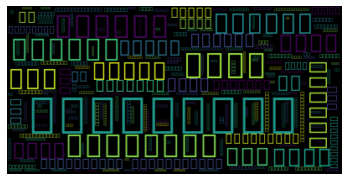

In [20]:

import matplotlib.pyplot as plt

wc = WordCloud(background_color="white", font_path=font_path, prefer_horizontal=1 , color_func=color_func) 
wc.generate_from_frequencies(freq)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()